Инициализируем иморты и метод Дики-Фуллера

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from scipy.stats import boxcox
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

Загрузим временной ряд закрытий акций Доу-Джонса. Выведем значения на графике.

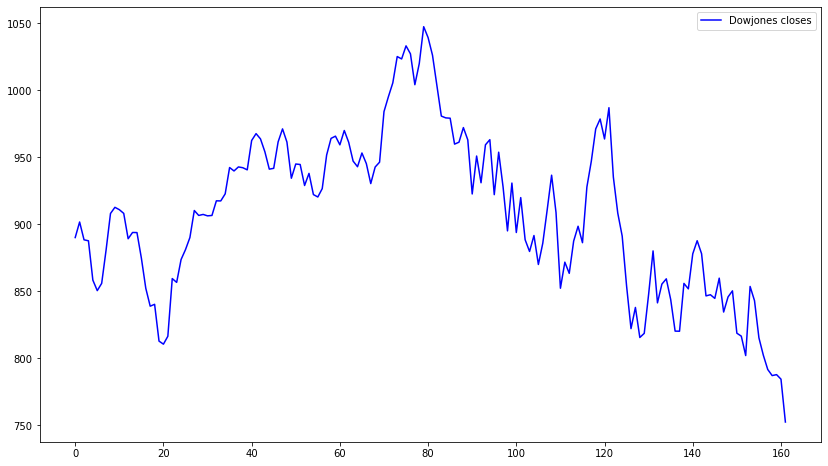

In [2]:
dowjones_closing = pd.read_csv("./weekly-closings-of-the-dowjones-.csv")
X = dowjones_closing['Close']

plt.figure(figsize=(14,8))
plt.plot(dowjones_closing['Close'], color='blue', label='Dowjones closes')
plt.legend()
plt.show()

Видно, что сезонность и периодичность на данном временном ряде отсутствует.
Преобразуем ряд методом бокса-кокса и дифференцированием. Обучим модель GARCH этими данными

In [3]:
X = boxcox(X, 0)
X = X[1:] - X[:-1]

garch_model = arch_model(X)
res = garch_model.fit(update_freq=5)

Iteration:      5,   Func. Count:     43,   Neg. LLF: 134.52964234498737
Iteration:     10,   Func. Count:     75,   Neg. LLF: -392.81242212108737
Optimization terminated successfully    (Exit mode 0)
            Current function value: -392.812422121087
            Iterations: 11
            Function evaluations: 90
            Gradient evaluations: 11


Воспользуемся методом Дики-Фуллера

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


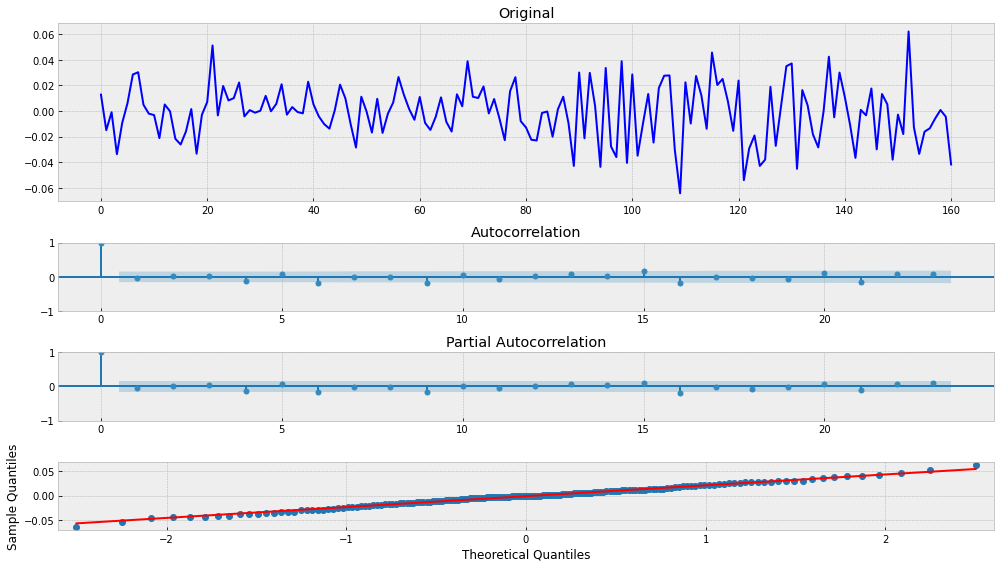

In [4]:
tsplot(res.resid)

По всем показателям можно определить, что метод получился оптимальным, а результирующий ряд стационарен.
Выведем результаты и волатильность на графике, с помощью метода plot.

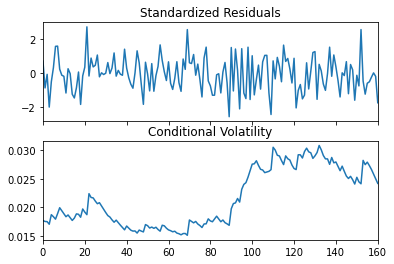

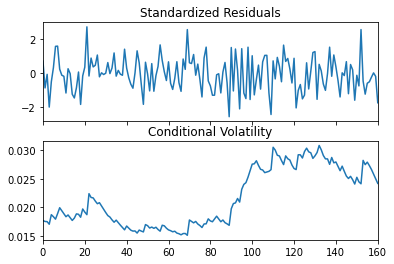

In [5]:
res.plot()